In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [2]:
data = pd.read_csv('Catalogues/NGC5822_2.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,226.356665,-56.357353,5880537795693680384,0.5296,-5.470,-2.782,95,NaN,1.0920,1.052,19.901850,21.685026,18.625610,3.059416,NaN,-37.181311,226.356709,-56.357341,NaN
1,226.361800,-56.353948,5880537795693680768,-0.0387,-5.575,-3.232,95,NaN,1.1746,1.072,18.881670,21.047142,17.567514,3.479628,NaN,-37.177135,226.361845,-56.353934,NaN
2,226.370376,-56.357701,5880537799989313408,0.7526,-4.256,-2.386,95,NaN,1.2387,1.063,20.189924,21.503067,19.058859,2.444208,NaN,-37.179021,226.370410,-56.357690,NaN
3,226.366431,-56.354436,5880537799989320448,0.8083,-2.857,-1.351,31,1.269,NaN,0.988,19.200275,20.446186,18.044996,2.401190,NaN,-37.176709,226.366454,-56.354430,0.825036
4,226.364406,-56.353145,5880537799989322880,-0.1550,-6.957,-4.280,95,NaN,1.2077,1.064,19.753582,21.257765,18.621637,2.636128,NaN,-37.175884,226.364462,-56.353126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168234,226.289840,-52.372824,5900349178464466176,-1.6185,-3.531,-3.431,95,NaN,1.1041,1.032,20.356627,21.277514,19.249498,2.028015,NaN,-33.442668,226.289866,-52.372809,NaN
3168235,226.291209,-52.372532,5900349178465227520,0.4075,-4.950,-6.181,95,NaN,1.7444,1.163,20.275833,21.081573,19.279041,1.802532,NaN,-33.442117,226.291245,-52.372505,NaN
3168236,226.295759,-52.375918,5900349178485667456,0.3001,-1.529,-3.170,31,1.380,NaN,1.032,17.774643,18.613610,16.902786,1.710823,NaN,-33.444399,226.295770,-52.375904,0.327686
3168237,226.287764,-52.371343,5900349178485670016,0.4708,-4.717,-2.485,31,1.392,NaN,0.968,17.747835,18.506895,16.907770,1.599125,NaN,-33.441687,226.287799,-52.371332,0.498357


In [3]:
#https://simbad.cds.unistra.fr/simbad/sim-ref?bibcode=2020A%26A...633A..99C
pmra_sbd = -7.422
pmde_sbd = -5.534
L_size = 2
 
data_mov = movprop_filter(data,pmra_sbd,pmde_sbd,L_size,"vizier")
len(data_mov)

709370

Text(0.5, 0, 'RA (deg)')

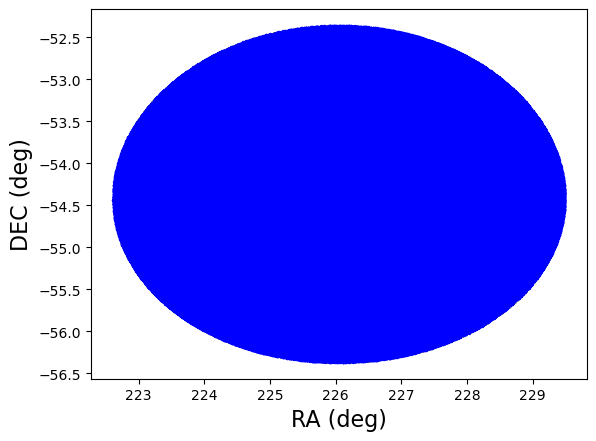

In [4]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

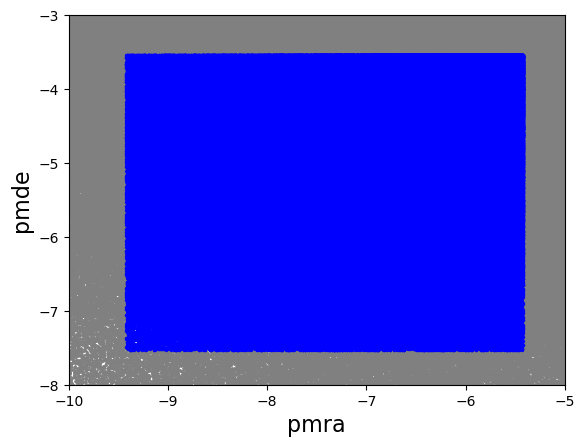

In [9]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.set_xlim(-10.,-5.)
ax.set_ylim(-8.,-3.)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

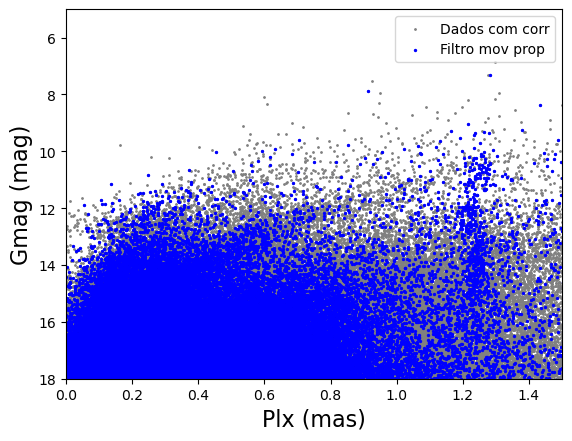

In [11]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

### Cut in Parallax

In [21]:
ll, = np.where((data_mov["Plx_corr"] < 1.35)&(data_mov["Plx_corr"] > 1.1))

In [22]:
data_plx = data_mov.iloc[ll]

Text(0.5, 0, 'RA (deg)')

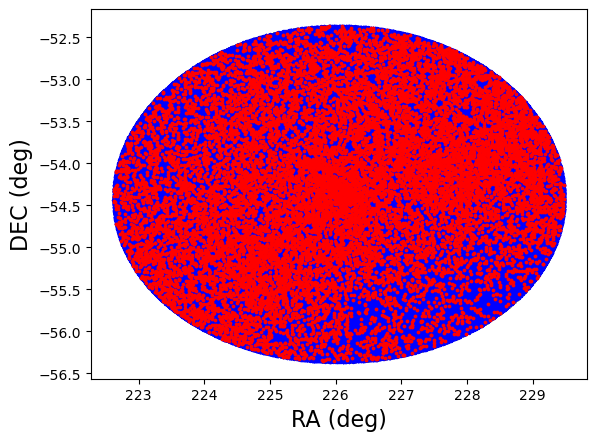

In [23]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.scatter(data_plx.RAJ2000, data_plx.DEJ2000,color = 'r', s=3)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

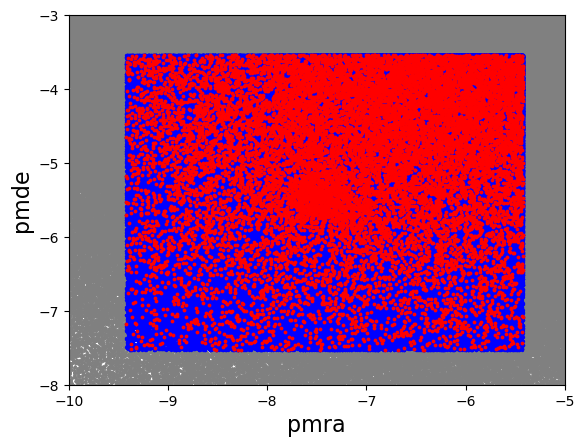

In [24]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.scatter(data_plx.pmRA, data_plx.pmDE,color = 'r', s=3)
ax.set_xlim(-10.,-5.)
ax.set_ylim(-8.,-3.)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

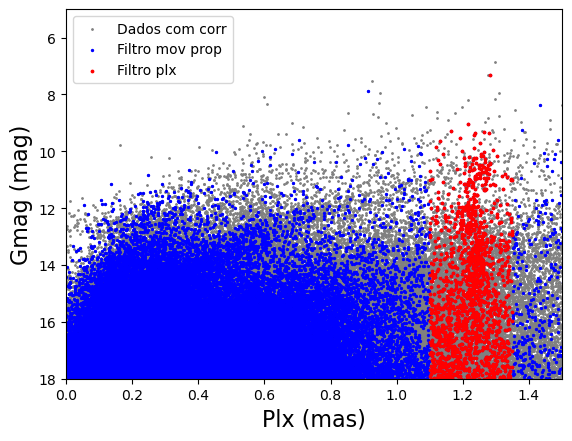

In [25]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.scatter(data_plx.Plx_corr,data_plx.Gmag,color = 'r', s=3, label='Filtro plx')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

In [28]:
#data_plx.to_csv('Catalogues/NGC5822_4.csv', index=False) 